In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
musica = pd.read_excel('top10s.xlsx')

del musica['title']
del musica['artist']
del musica['top genre']

data = pd.DataFrame(musica)

data

,Num,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,2010,97,89,67,-4,8,80,217,19,4,83
1,2,2010,87,93,75,-5,52,64,263,24,23,82
2,3,2010,120,84,76,-3,29,71,200,10,14,80
3,4,2010,119,92,70,-4,8,71,295,0,4,79
4,5,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2019,104,66,61,-7,20,16,176,1,3,75
598,599,2019,95,79,75,-6,7,61,206,21,12,75
599,600,2019,136,76,53,-5,9,65,260,7,34,70
600,601,2019,114,79,60,-6,42,24,217,1,7,69


In [3]:
def regress(y,x):
    X_cp = sm.add_constant(x)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

In [4]:
data.describe()

,Num,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,301.500000,2014.586379,118.568106,70.478405,64.370432,-5.579734,17.800664,52.157807,224.687708,14.347176,8.355482,66.501661
std,173.926709,2.605513,24.809816,16.311966,13.387878,2.800247,13.097616,22.470169,34.157005,20.777341,7.489085,14.522259
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.250000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,301.500000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,451.750000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.750000,17.000000,9.000000,76.000000
max,602.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [5]:
data.isnull().sum()

Num      0
year     0
bpm      0
nrgy     0
dnce     0
dB       0
live     0
val      0
dur      0
acous    0
spch     0
pop      0
dtype: int64

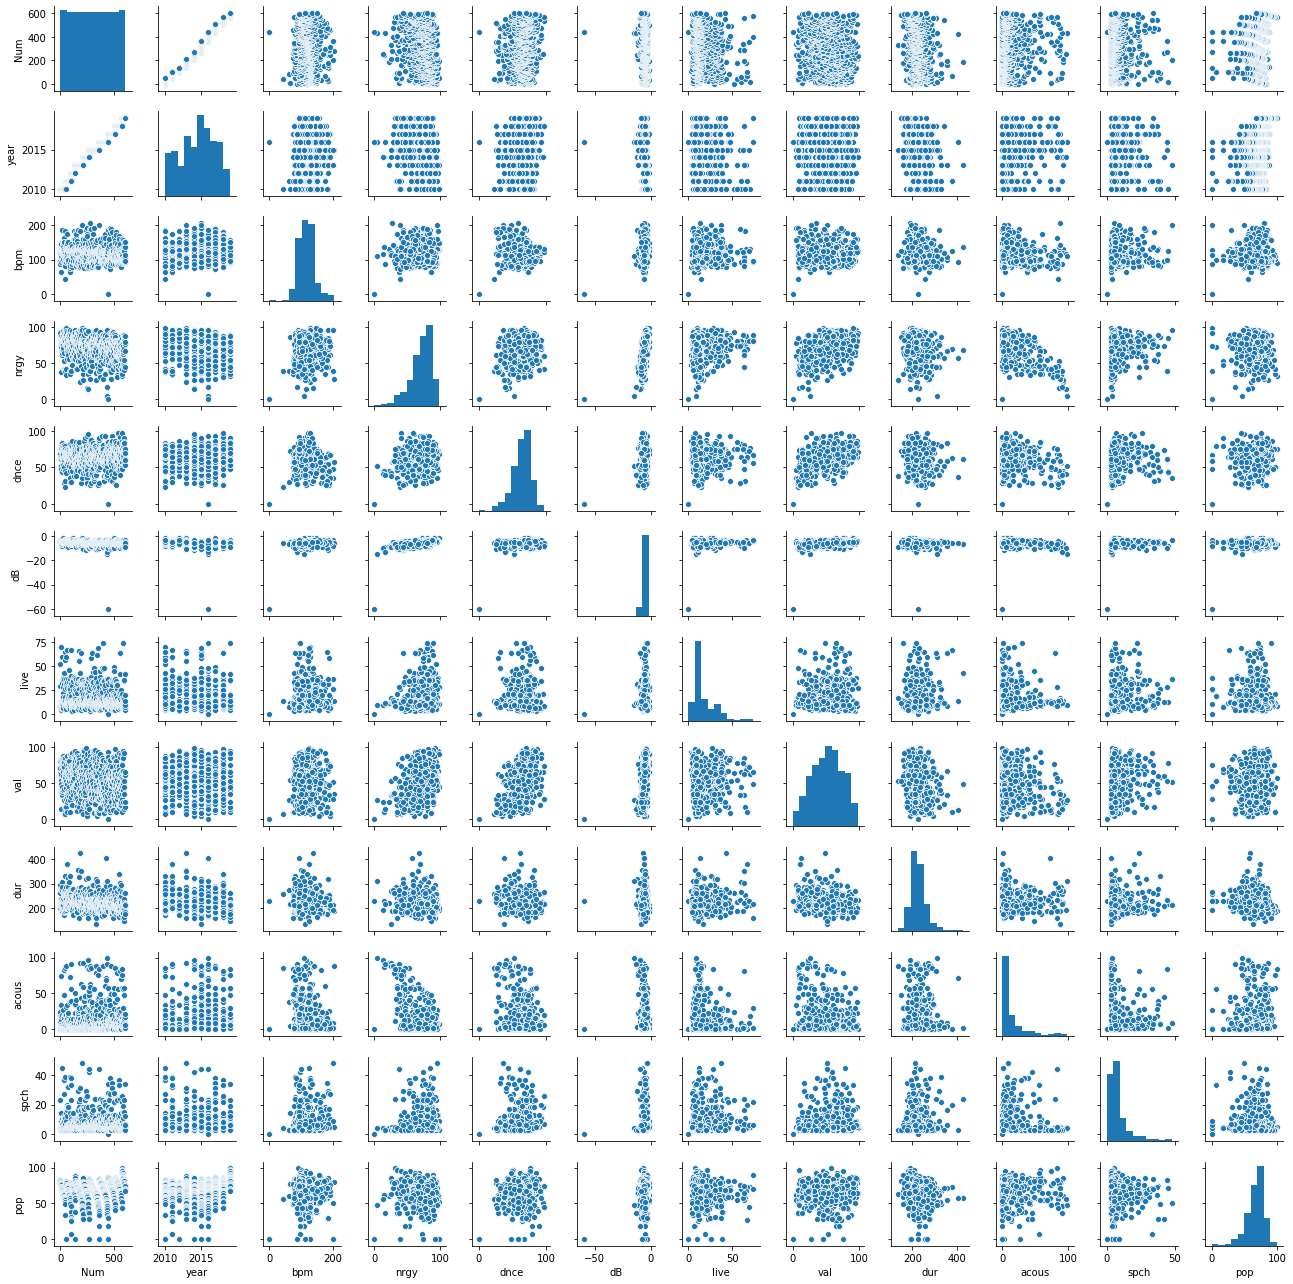

In [6]:
sns.pairplot(data, height=1.5);

In [19]:
y=data['pop']
x=data[['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','Num']]

In [20]:
resultados = regress(y,x)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     43.68
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           3.39e-69
Time:                        18:45:48   Log-Likelihood:                -2285.1
No. Observations:                 602   AIC:                             4594.
Df Residuals:                     590   BIC:                             4647.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.639e+04   2358.863    -19.668      0.000    -5.1e+04   -4.18e+04
year          23.1179      1.173     19.704      0.000      20.814      25.422
bpm           -0.0128      0.019     -0.682      0.496      -0.050       0.024
nrgy          -0.0719      0.042     -1.694      0.091      -0.155       0.011
dnce           0.0593      0.041      1.438      0.151      -0.022       0.140
dB             0.9756      0.200      4.880      0.000       0.583       1.368
live          -0.0227      0.035     -0.643      0.520      -0.092       0.047
val           -0.0191      0.026     -0.737      0.462      -0.070       0.032
dur           -0.0145      0.014     -1.025      0.306      -0.042       0.013
acous         -0.0121      0.027     -0.446      0.656      -0.065       0.041
spch           0.0248      0.062      0.403      0.687      -0.096       0.146
Num           -0.3310      0.018    -18.861      0.000      -0.365      -0.297
==============================================================================
Omnibus:                      198.198   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.856
Skew:                          -1.443   Prob(JB):                    6.38e-186
Kurtosis:                       8.067   Cond. No.                     1.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df=data[['nrgy','dB','year']]
resultados2=regress(y,df)
resultados2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     24.16
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           9.02e-15
Time:                        18:47:18   Log-Likelihood:                -2430.0
No. Observations:                 602   AIC:                             4868.
Df Residuals:                     598   BIC:                             4886.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2614.1370    445.962     -5.862      0.000   -3489.980   -1738.294
nrgy          -0.1313      0.042     -3.160      0.002      -0.213      -0.050
dB             1.3822      0.238      5.819      0.000       0.916       1.849
year           1.3390      0.221      6.057      0.000       0.905       1.773
==============================================================================
Omnibus:                      176.347   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.421
Skew:                          -1.447   Prob(JB):                    2.37e-106
Kurtosis:                       6.319   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
beta0 = resultados2.params[0]  
beta1 = resultados2.params[1]  
beta2 = resultados2.params[2]

In [25]:
def f(feature1, feature2):
    return beta0 + beta1*feature1 + beta2*feature2

In [27]:
npoints = 100
feature1 = df["year"]
feature2 = df["dB"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [28]:
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [29]:
fit_z = f(eixo_x, eixo_y)

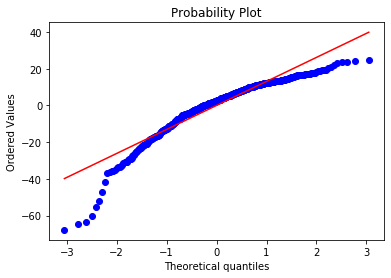

In [30]:
stats.probplot(resultados2.resid,dist='norm',plot=plt);

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
results_teste = regress(y,x)
y_pred= results_teste.predict(sm.add_constant(x))
erro=mean_squared_error(y,y_pred)
erro2=mean_absolute_error(y,y_pred)
print(erro,erro2)

116.0414999468546 8.09259897980693


C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(array([  6.,   2.,   6.,  18.,  30.,  86., 159., 211.,  74.,  10.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

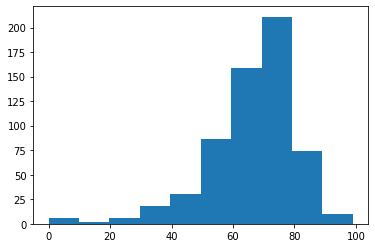

In [48]:
plt.hist(y)

(array([  3.,   0.,   4.,   5.,  15.,  38., 170., 192., 149.,  26.]),
 array([-62.39171733, -53.7808609 , -45.17000448, -36.55914806,
        -27.94829163, -19.33743521, -10.72657878,  -2.11572236,
          6.49513407,  15.10599049,  23.71684692]),
 <a list of 10 Patch objects>)

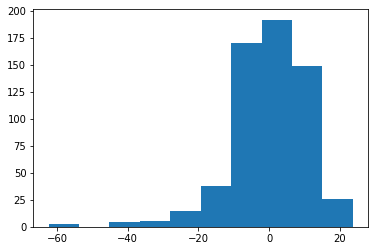

In [49]:
plt.hist(y-y_pred)

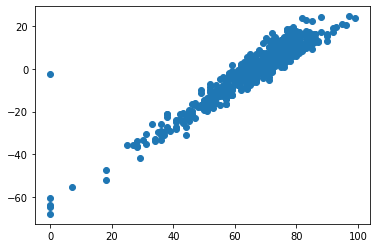

In [37]:
plt.scatter(y,resultados2.resid);

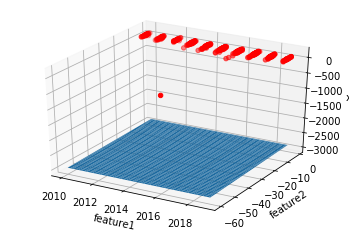

In [38]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("x")
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0) 
regressor.fit(x,y)   
y_pred= regressor.predict(x)
erro=mean_squared_error(y,y_pred)
erro2=mean_absolute_error(y,y_pred)
print(erro,erro2)

14.118644061461792 2.2719850498338867
